# Generating Rest Frame SEDs from a Parametric Galaxy

Building on the `make_sfzh` documents we can now see how to generate a galaxy and produce its rest-frame spectral energy distribution.


In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, ZDist, Stars
from synthesizer.parametric.galaxy import Galaxy
from unyt import yr, Myr, Angstrom, Msun, c
from astropy.cosmology import Planck18 as cosmo
import cmasher as cmr

In [35]:
# set style
plt.style.use('../../matplotlibrc.txt')

Initialise grid

In [36]:
grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids/'
grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0_cloudy-c23.01-sps'

grid = Grid(grid_name, grid_dir=grid_dir)

Next we can define the star formation and metal enrichment history:

In [37]:



# A simple function to generate a galaxy and reprocessed sed for a given star formation duration 
def generate_galaxy(sf_duration):

    # define the functional form of the star formation and metal enrichment histories
    sfh = SFH.Constant(duration=sf_duration)  # constant star formation
    metal_dist = ZDist.DeltaConstant(log10metallicity=-2.0)  # constant metallicity

    # get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).
    stars = Stars(
        grid.log10age,
        grid.metallicity,
        sf_hist=sfh,
        metal_dist=metal_dist,
        initial_mass=10**8,
    )

    galaxy = Galaxy(stars)
    
    return galaxy

In [38]:
galaxy = generate_galaxy(10 * Myr)
sed = galaxy.stars.get_spectra_reprocessed(grid)

In [39]:
lines = galaxy.stars.get_line_intrinsic(grid, line_ids = grid.available_lines)
print(lines)

----------
LINE COLLECTION
lines: ['Ne 6 1005.73A' 'S 3 1015.50A' 'S 3 1021.11A' 'S 3 1021.32A'
 'He 2 1025.27A' 'H 1 1025.72A' 'O 6 1031.91A' 'C 2 1036.34A'
 'C 2 1037.02A' 'O 6 1037.61A' 'S 4 1062.66A' 'S 4 1072.97A'
 'S 4 1073.52A' 'N 2 1083.99A' 'N 2 1084.56A' 'N 2 1084.58A'
 'He 2 1084.94A' 'N 2 1085.55A' 'N 2 1085.70A' 'N 1 1134.17A'
 'N 1 1134.41A' 'N 1 1134.98A' 'Ne 5 1136.52A' 'Ne 5 1145.61A'
 'C 3 1174.93A' 'C 3 1175.26A' 'C 3 1175.59A' 'C 3 1175.71A'
 'C 3 1175.99A' 'C 3 1176.37A' 'Si 2 1179.59A' 'Mg 6 1190.12A'
 'Si 2 1190.42A' 'Mg 6 1191.67A' 'Si 2 1193.29A' 'S 3 1194.45A'
 'Si 2 1194.50A' 'S 10 1196.21A' 'Si 2 1197.39A' 'S 5 1199.13A'
 'N 1 1199.55A' 'N 1 1200.22A' 'N 1 1200.71A' 'Si 3 1206.50A'
 'S 10 1212.93A' 'O 5 1213.81A' 'He 2 1215.13A' 'H 1 1215.67A'
 'O 5 1218.34A' 'N 5 1238.82A' 'N 5 1242.80A' 'Si 2 1260.42A'
 'Si 2 1264.74A' 'Si 2 1265.00A' 'O 1 1302.17A' 'Si 2 1304.37A'
 'O 1 1304.86A' 'O 1 1306.03A' 'Si 2 1309.28A' 'Ni 2 1324.11A'
 'C 2 1334.53A' 'C 2 1335.66A

Let's make a plot of the UV - NIR incident, total, and nebular spectra and save it

/Users/sw376/Dropbox/Research/projects/synthesizer-lines/venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_85961/1635138393.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


H 1 1215.67A 0.0 0 0
O 2 3726.03A 1.0 0 1
O 2 3728.81A 1.0 1.0 1
Ne 3 3868.76A 1.0 1.0 2
H 1 3889.05A 1.0 1.0 3
Ne 3 3967.47A 1.0 1.0 4
H 1 3970.07A 1.0 1.0 5
H 1 4101.73A 1.0 1.0 6
H 1 4340.46A 1.0 1.0 7
H 1 4861.32A 2.0 1.0 8
O 3 4958.91A 2.0 2.0 1
O 3 5006.84A 2.0 2.0 2
He 1 5875.61A 2.0 2.0 3
He 1 5875.64A 2.0 2.0 4
O 1 6300.30A 3.0 2.0 5
N 2 6548.05A 3.0 3.0 1
H 1 6562.80A 3.0 3.0 2
N 2 6583.45A 3.0 3.0 3
He 1 6678.15A 3.0 3.0 4
S 2 6716.44A 3.0 3.0 5
S 2 6730.82A 3.0 3.0 6
He 1 7065.18A 3.0 3.0 7
He 1 7065.22A 3.0 3.0 8
Ar 3 7135.79A 3.0 3.0 9
O 2 7319.99A 3.0 3.0 10
O 2 7329.67A 3.0 3.0 11
O 2 7330.73A 3.0 3.0 12
Ar 3 7751.11A 3.0 3.0 13


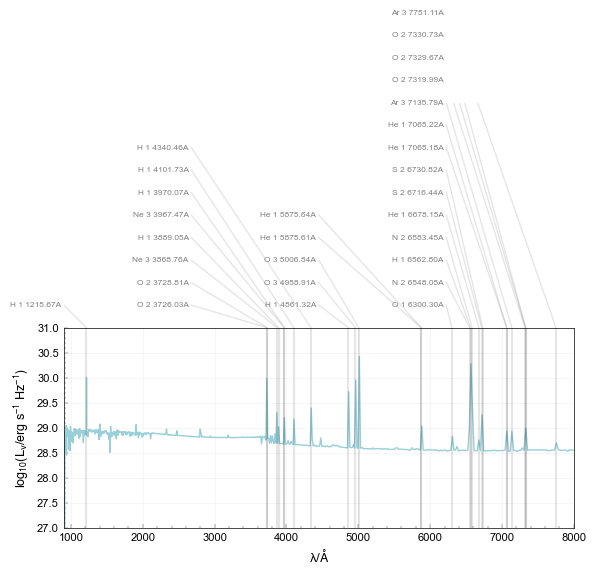

In [48]:



wavelength_limits = [900., 8000.] # Angstrom

fig = plt.figure(figsize=(6.0, 5.))

bottom = 0.15
height = 0.4
left = 0.1
width = 0.85
height2 = 0.45

# add main axes
ax = fig.add_axes((left, bottom, width, height))

# add axes for line labels and ...
ax2 = fig.add_axes((left, bottom+height, width, height2))

# ... turn off.
ax2.set_axis_off()

# sections to split labels in 
label_sections = 4

# the width of each section in wavelength
section_wavelength_width = (wavelength_limits[1] - wavelength_limits[0]) / label_sections

# plot reprocessed spectra 
spectra_id = 'reprocessed'
sed = galaxy.stars.spectra[spectra_id]
ax.plot(sed.lam, np.log10(sed.lnu), c=colours[2], lw=1, alpha=1.0)



# loop over lines and keep them if their equivalent widths surpass the threshold 
threshold = 10.

# get an array of equivalent_widths
equivalent_widths = np.array([lines[line_id].equivalent_width for line_id in lines.line_ids])

# get a mask of lines meeting the equivalent width threshold
s = (equivalent_widths > threshold) & (lines.wavelengths> wavelength_limits[0]) & (lines.wavelengths < wavelength_limits[1])

i = 0
maxi = 0
current_section = 0

for line_id, line_wavelength in zip(lines.line_ids[s], lines.wavelengths[s]):
    ax.axvline(line_wavelength, c='k', alpha=0.1)

    # determine the label section
    section = np.floor((line_wavelength.value - wavelength_limits[0]) / section_wavelength_width)

    print(line_id, section, current_section, i)

    # if in a new section reset counter
    if section != current_section:
        current_section = section
        i = 0

    x1 = line_wavelength
    x2 = wavelength_limits[0] + section_wavelength_width * section 

    ax2.plot([x2, x1], [i*0.1+0.1, 0.0], c='k', lw=1, alpha=0.1)
    ax2.text(x2 - section_wavelength_width*0.02, i*0.1 + 0.1, line_id, fontsize=6, c='0.5', ha='right', va='center')

    i += 1
    if i > maxi: 
        maxi = i

ax.legend(fontsize=8)
ax.set_xlim(wavelength_limits)
ax.set_ylim([27., 31.])
ax.set_xlabel(r'$\rm \lambda/\AA$')
ax.set_ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1})$')


ax2.set_xlim(wavelength_limits)
ax2.set_ylim([0,1])

fig.savefig('sed_with_line_labels.pdf')
fig.show()
